[MAP estimation] w0:-0.55, w1:0.55


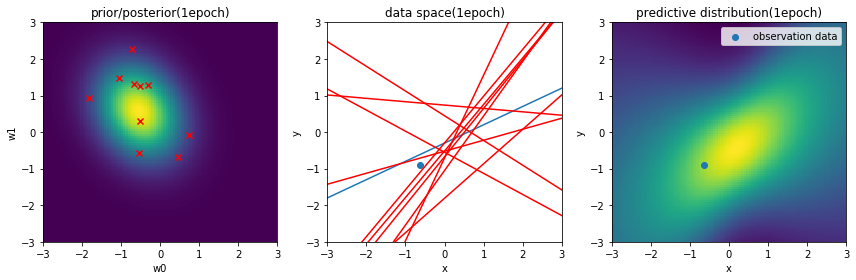

[MAP estimation] w0:-0.47, w1:0.38


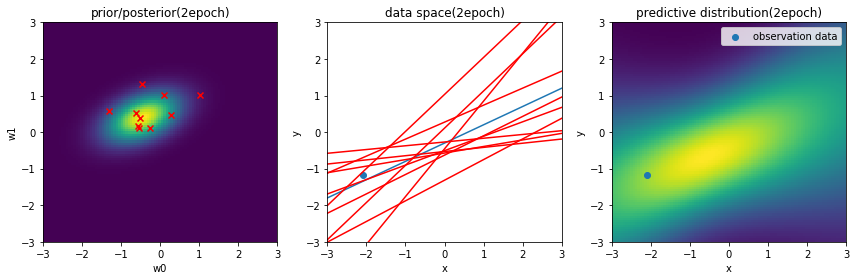

[MAP estimation] w0:-0.31, w1:0.51


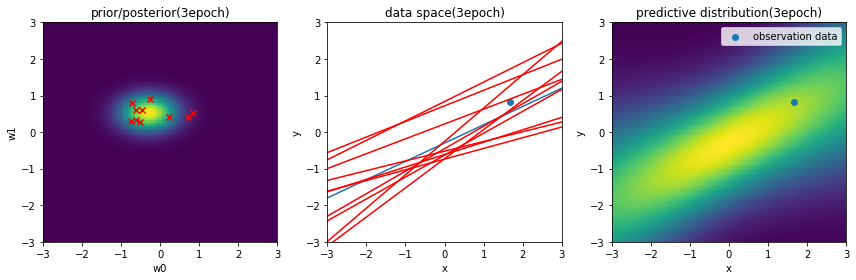

[MAP estimation] w0:-0.30, w1:0.51


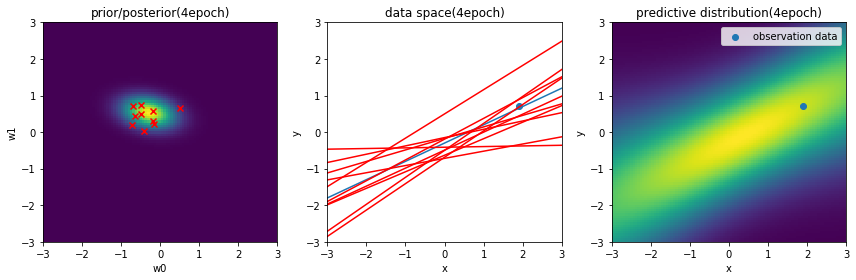

[MAP estimation] w0:-0.28, w1:0.51


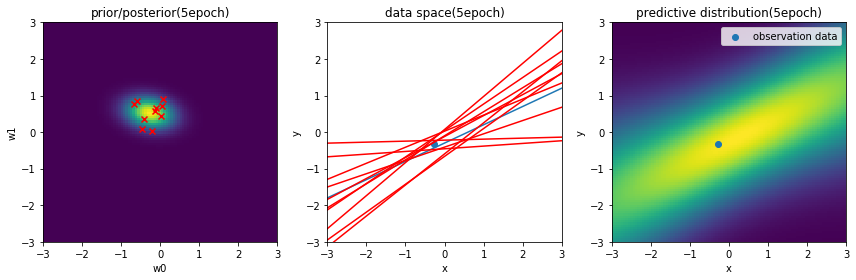

[MAP estimation] w0:-0.33, w1:0.55


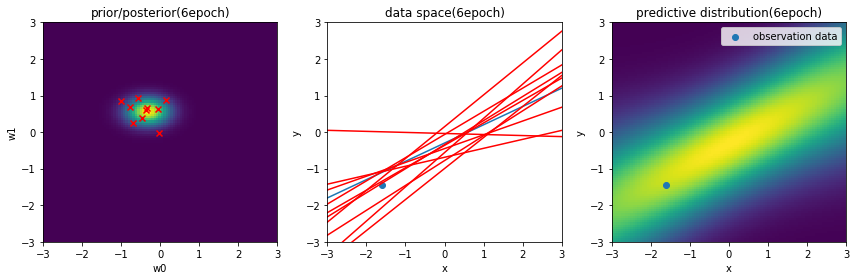

[MAP estimation] w0:-0.35, w1:0.56


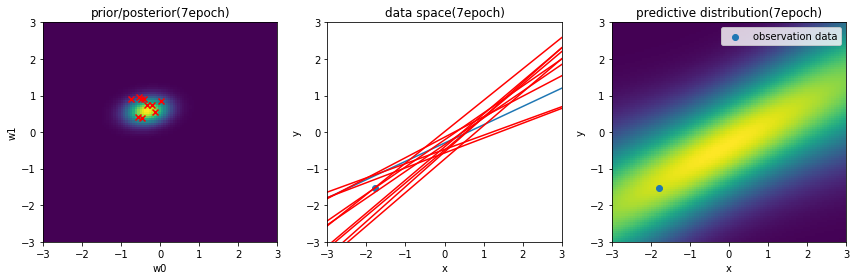

[MAP estimation] w0:-0.35, w1:0.56


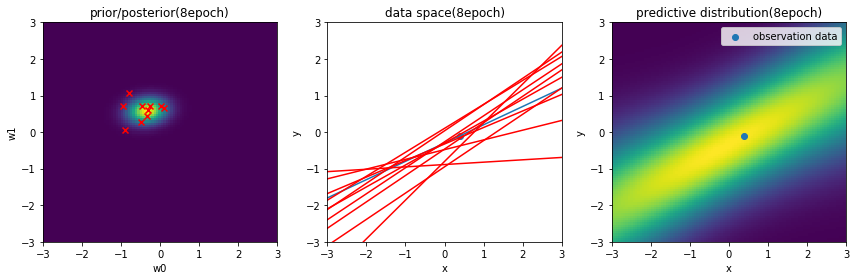

[MAP estimation] w0:-0.34, w1:0.58


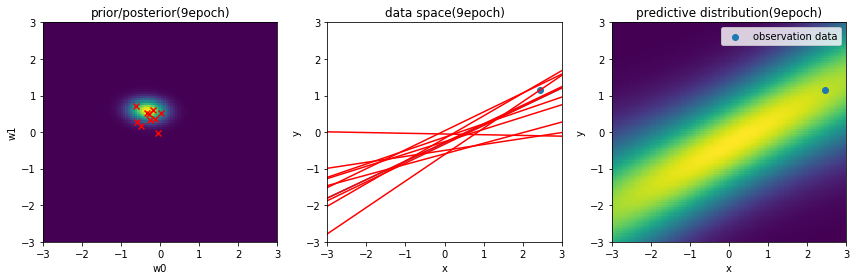

[MAP estimation] w0:-0.28, w1:0.56


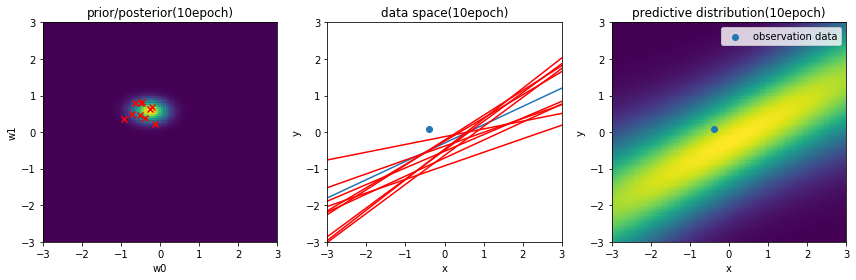

[MAP estimation] w0:-0.30, w1:0.55


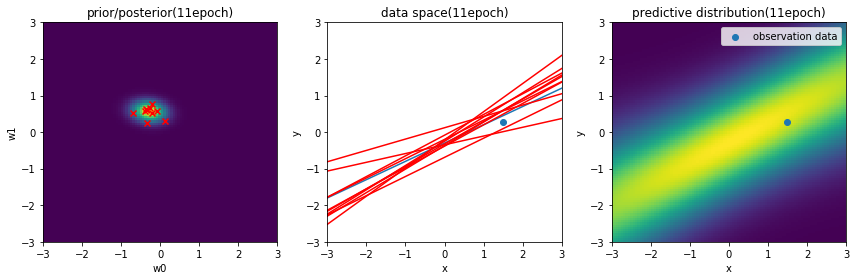

[MAP estimation] w0:-0.36, w1:0.58


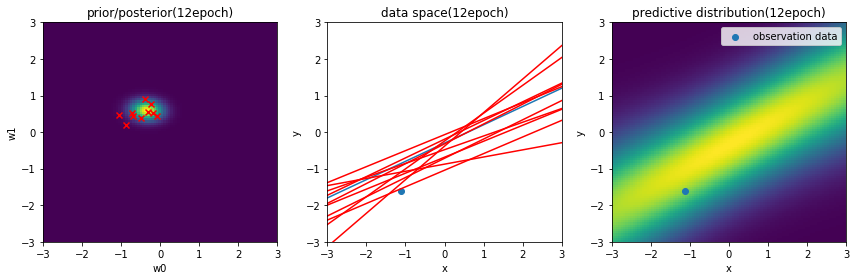

[MAP estimation] w0:-0.33, w1:0.60


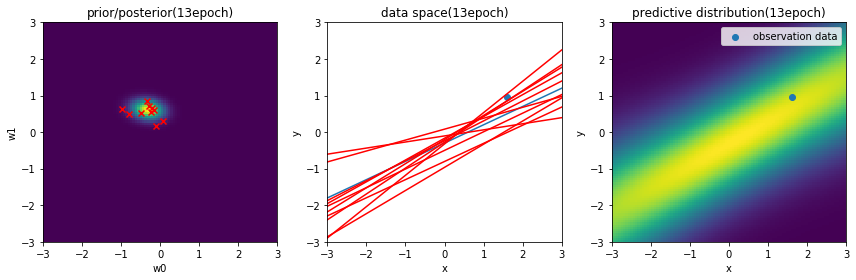

[MAP estimation] w0:-0.29, w1:0.56


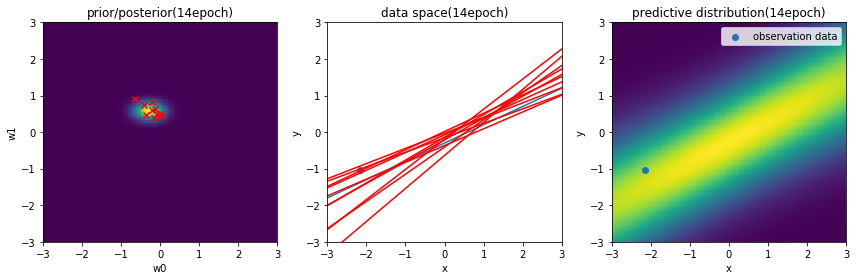

[MAP estimation] w0:-0.28, w1:0.55


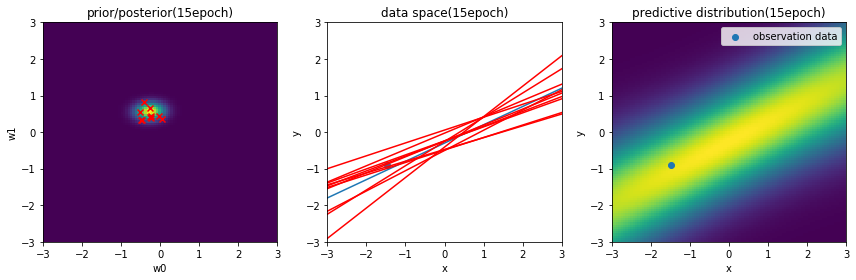

[MAP estimation] w0:-0.25, w1:0.52


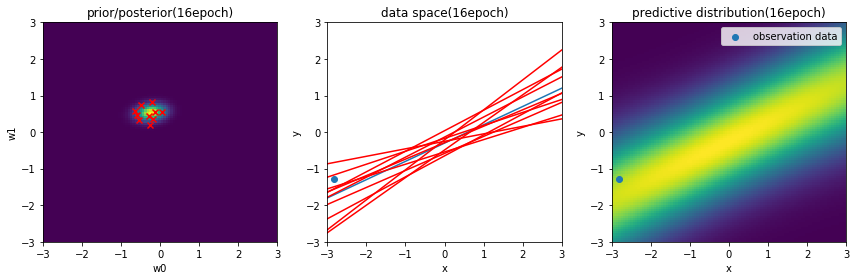

[MAP estimation] w0:-0.28, w1:0.49


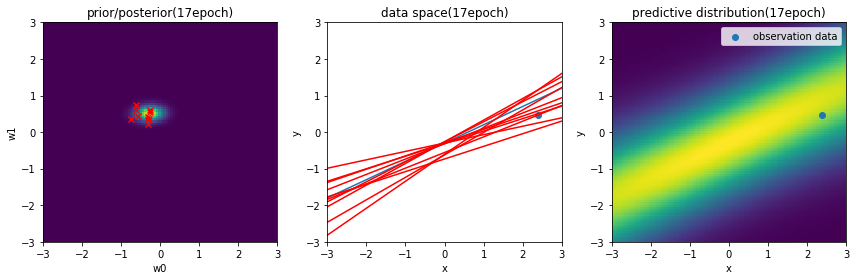

[MAP estimation] w0:-0.29, w1:0.49


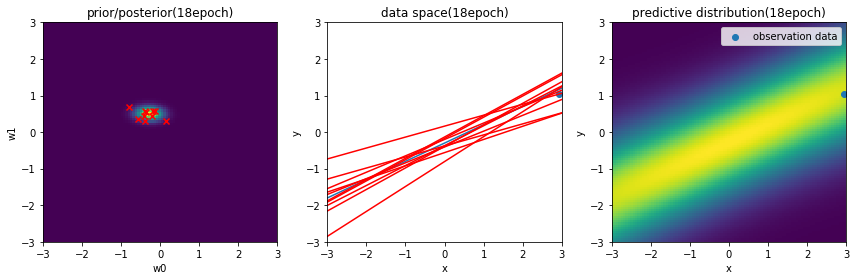

[MAP estimation] w0:-0.34, w1:0.53


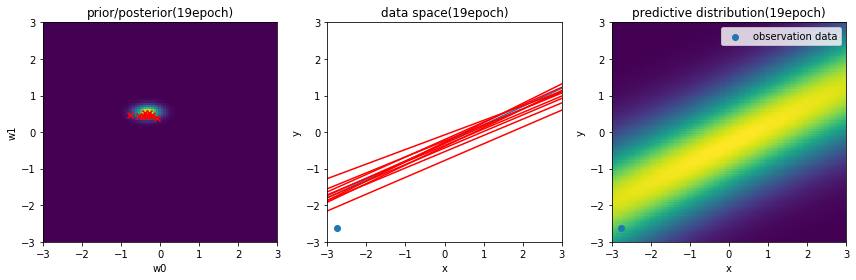

[MAP estimation] w0:-0.34, w1:0.52


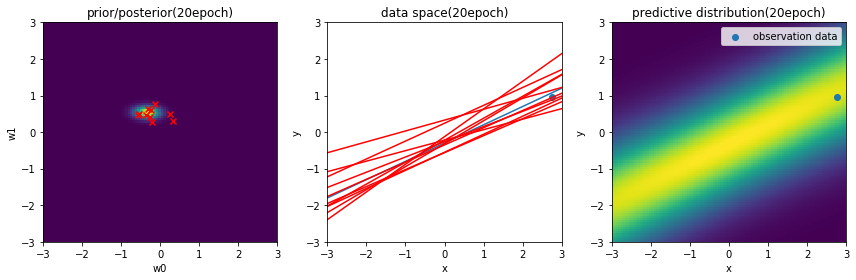

[MAP estimation] w0:-0.34, w1:0.52


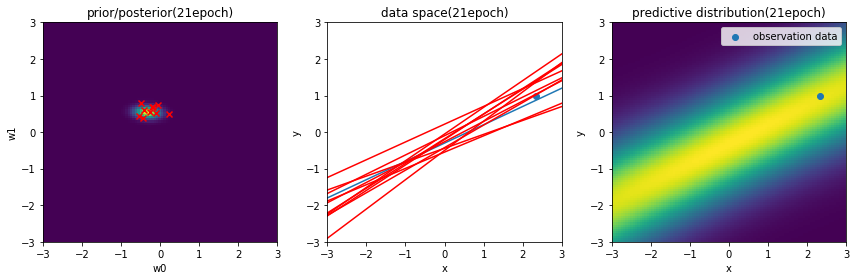

[MAP estimation] w0:-0.34, w1:0.52


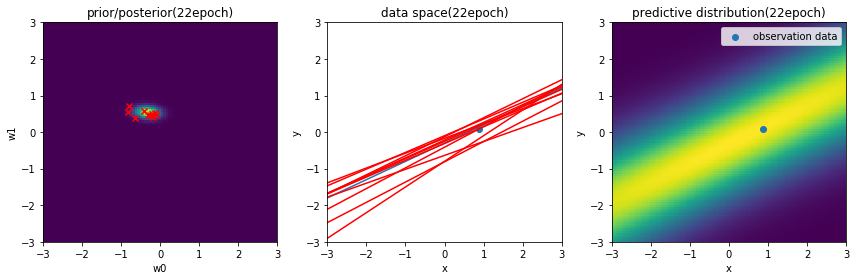

[MAP estimation] w0:-0.32, w1:0.51


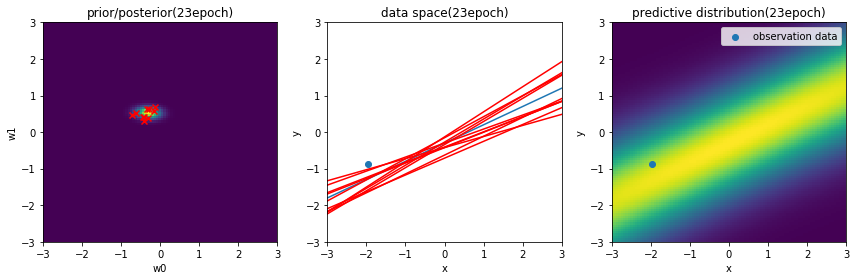

[MAP estimation] w0:-0.31, w1:0.50


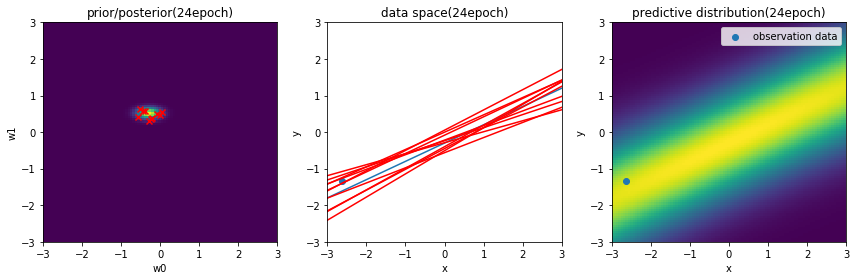

[MAP estimation] w0:-0.30, w1:0.50


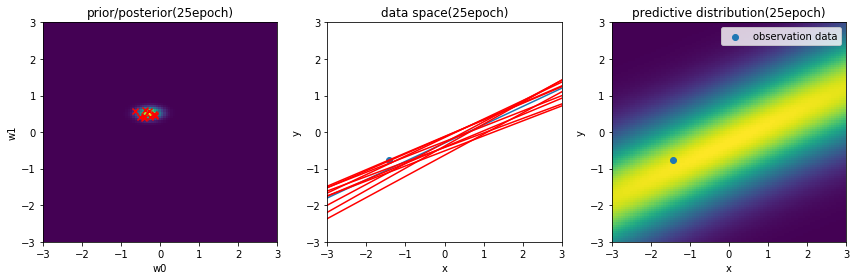

[MAP estimation] w0:-0.29, w1:0.50


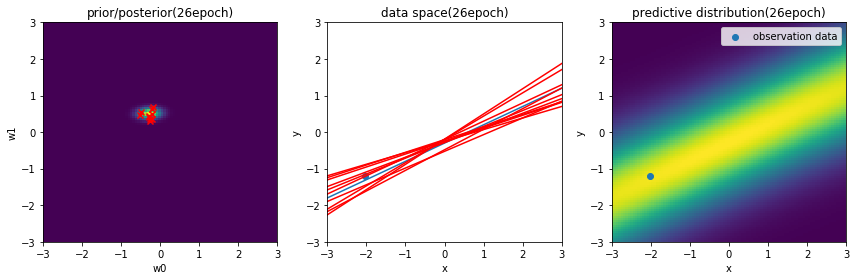

[MAP estimation] w0:-0.30, w1:0.50


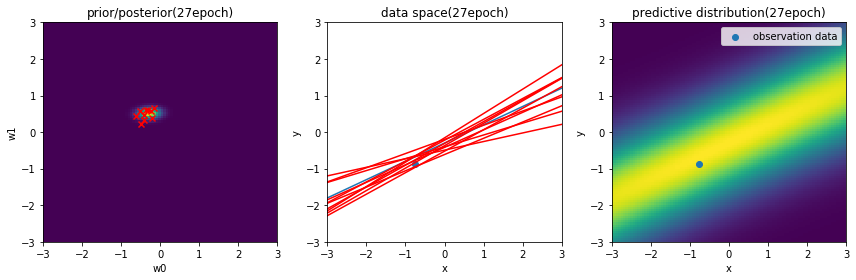

[MAP estimation] w0:-0.30, w1:0.50


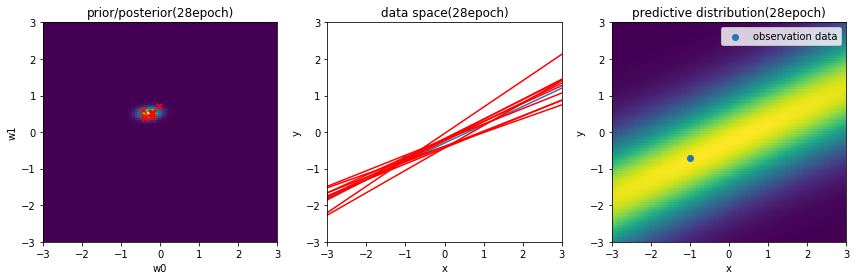

[MAP estimation] w0:-0.31, w1:0.50


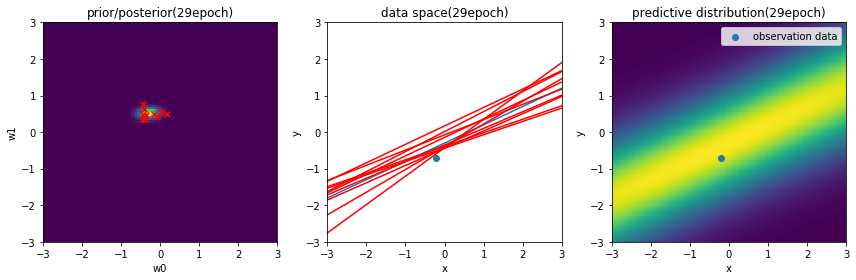

[MAP estimation] w0:-0.32, w1:0.49


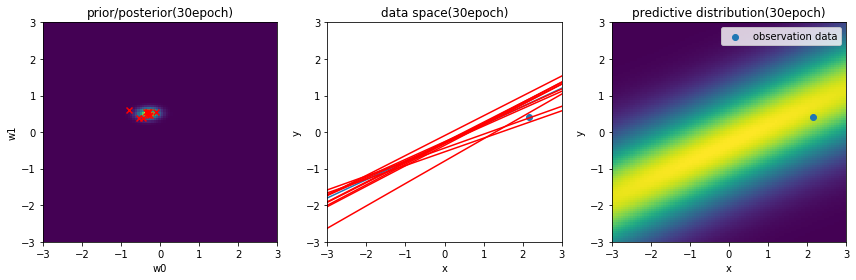

[MAP estimation] w0:-0.33, w1:0.49


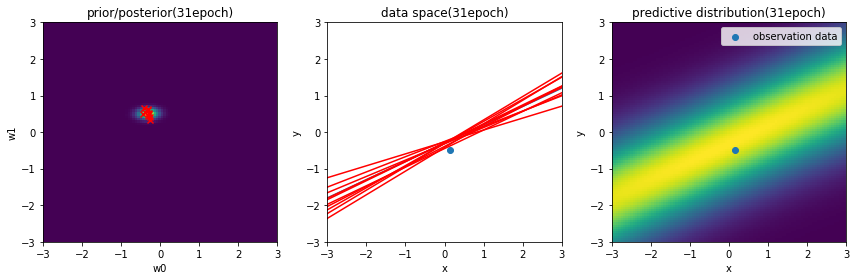

[MAP estimation] w0:-0.34, w1:0.49


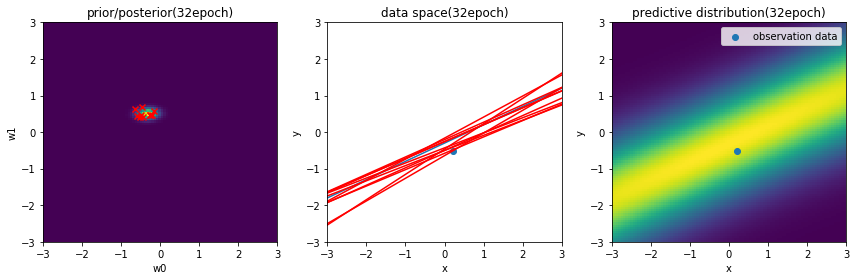

[MAP estimation] w0:-0.32, w1:0.49


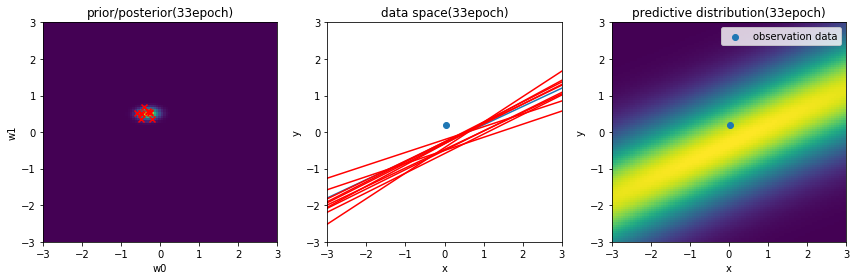

[MAP estimation] w0:-0.33, w1:0.48


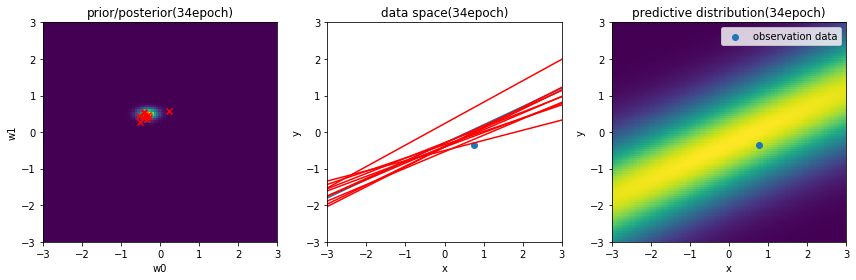

[MAP estimation] w0:-0.33, w1:0.48


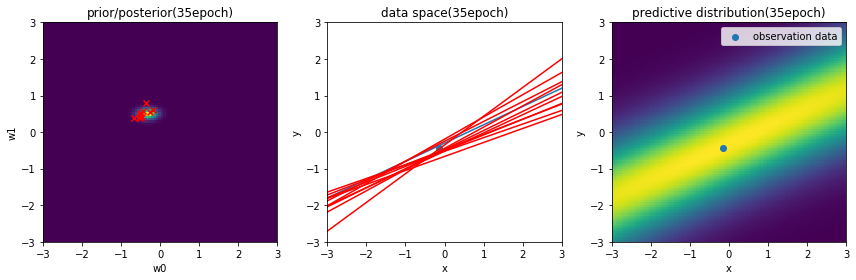

[MAP estimation] w0:-0.33, w1:0.48


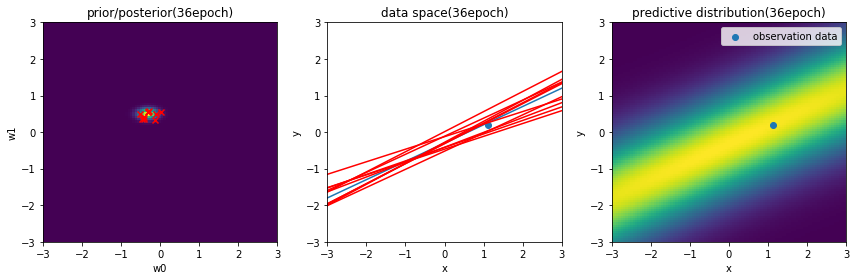

[MAP estimation] w0:-0.32, w1:0.49


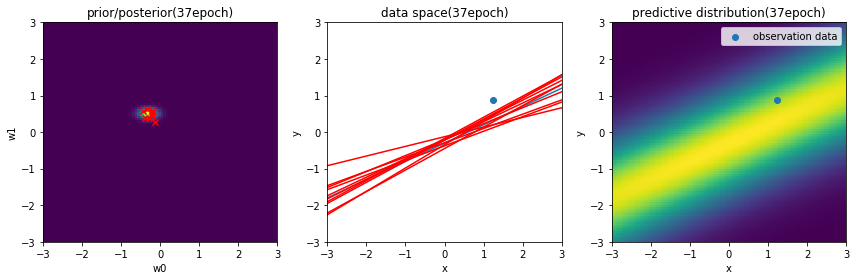

[MAP estimation] w0:-0.31, w1:0.50


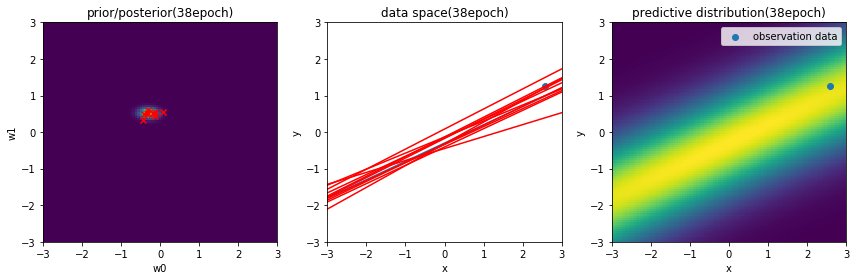

[MAP estimation] w0:-0.32, w1:0.50


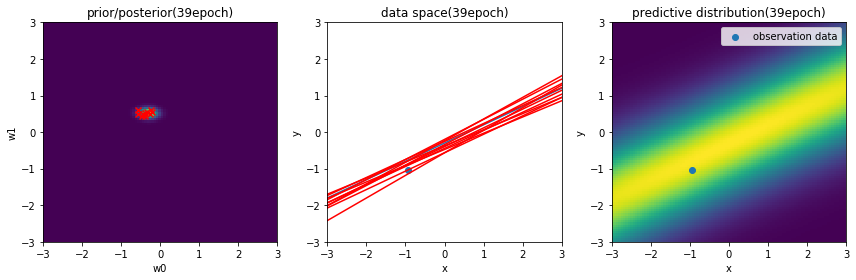

[MAP estimation] w0:-0.31, w1:0.51


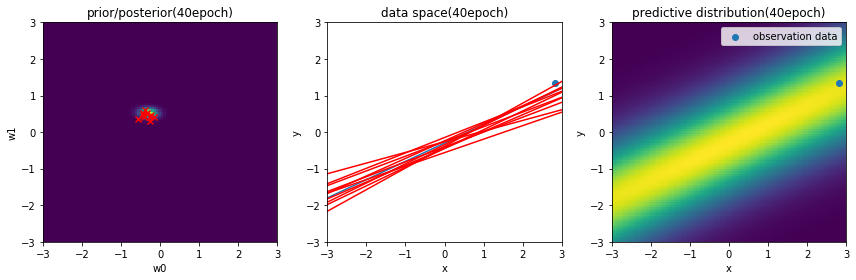

[MAP estimation] w0:-0.31, w1:0.50


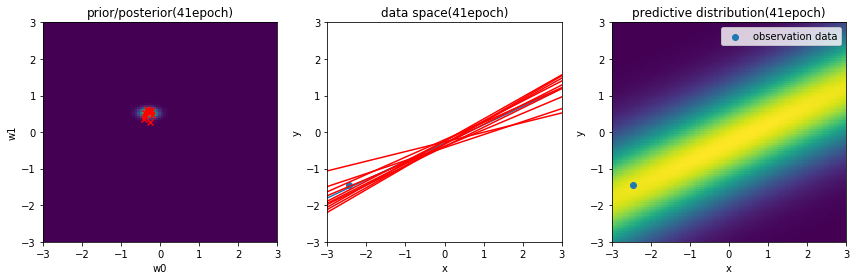

[MAP estimation] w0:-0.30, w1:0.50


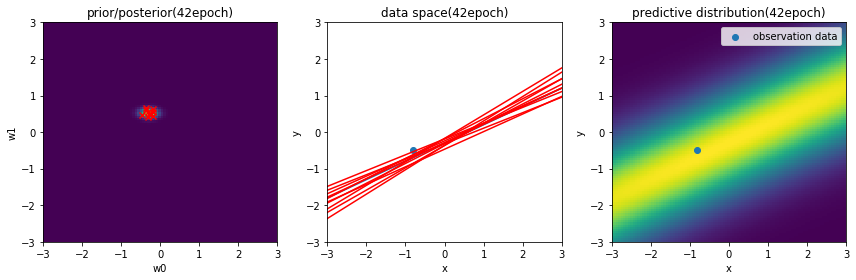

[MAP estimation] w0:-0.31, w1:0.50


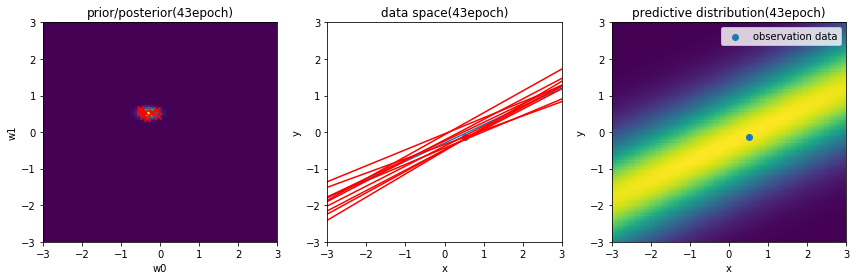

[MAP estimation] w0:-0.31, w1:0.50


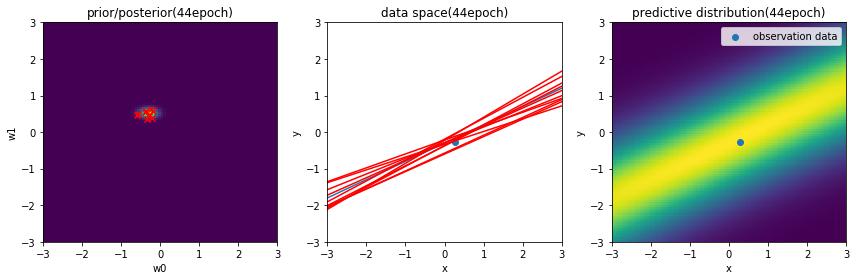

[MAP estimation] w0:-0.31, w1:0.50


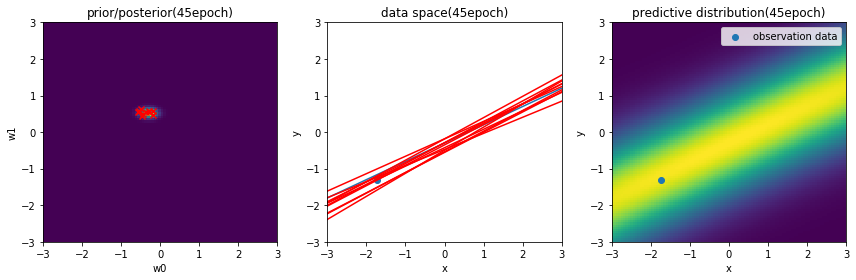

[MAP estimation] w0:-0.31, w1:0.50


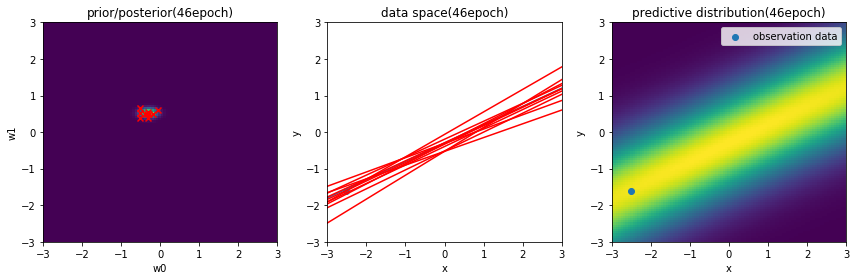

[MAP estimation] w0:-0.30, w1:0.50


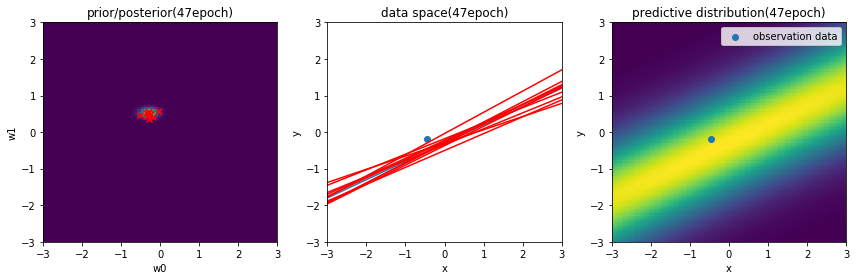

[MAP estimation] w0:-0.30, w1:0.50


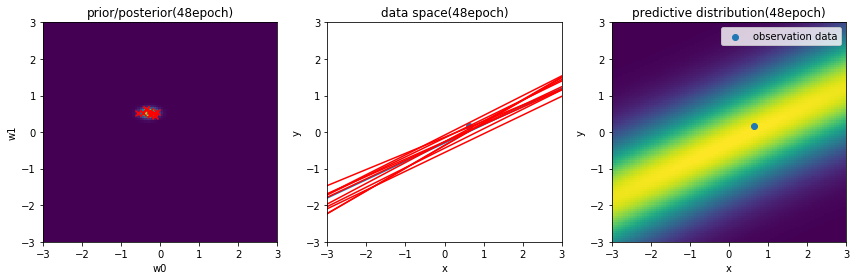

[MAP estimation] w0:-0.31, w1:0.50


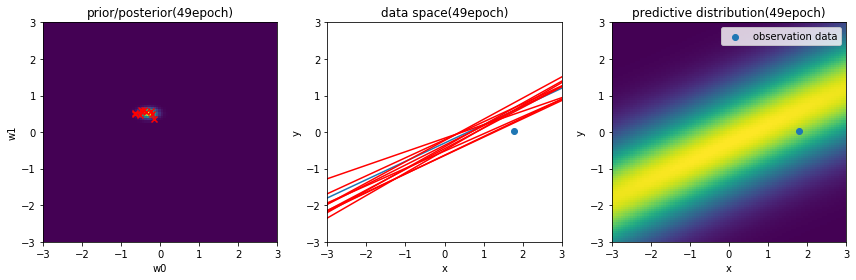

[MAP estimation] w0:-0.31, w1:0.50


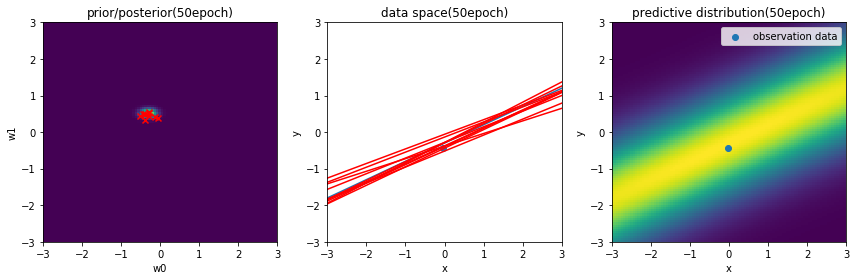

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

def phi(X):
    # X      : [[x0],[x1],...]
    # phi    : e.g. [1, x, x**2]
    # return : [[phi_1(X),...,phi_n(X)]]
    Phi = np.array([[1, x[0]] for x in X])
    return Phi.T

def Phi(X):
    # X is a input: [[x_1],[x_2],...,[x_n]] 
    phi = np.array([[[x[0]]] for x in X])
    #phi = np.array([[[x[0]],[x[0]**2]] for x in X])
    return np.array([[1, i] for i in phi]) # biasの追加

def maltivariate_gaussian_distribution(x, mu, sigma):
    # x(weight): D dimension maltivariate
    #        mu: D dimension
    #     sigma: D×D dimension
    exp = np.exp(-(1/2)*np.dot(np.transpose(x-mu), np.dot(np.linalg.inv(sigma),(x-mu))))
    return (1/(np.sqrt(2*np.pi)**(mu.shape[0]/2)))*(1/np.linalg.det(sigma)**(1/2))*exp

N = 100   # 個数
w0 = -0.3 # 切片パラメータ
w1 = 0.5  # 傾きパラメータ
beta = 1
alpha = 1
epsilon = 0.0000000001
epochs = 50
scope = 3

x = np.linspace(-scope,scope,N)
y = (w0 + w1 * x) + np.random.normal(0, 0.3, N)

x = np.array([[i] for i in x])
y = np.array([[i] for i in y])

prior = []
posterior = []
# データをシャッフルする
sample = np.random.permutation([[i,j] for i,j in zip(x,y)])

# モデルをデータにfitする
for n in range(epochs):    
    # 事後分布を出力する
    # データを全て使用して学習するとき
    #a = sample[:,0] + epsilon
    #b = sample[:,1] + epsilon
    # データを少しずつ増やして学習するとき（今までのデータ＋新規データで使用するとき）
    a = np.array(sample[:n+1,0]) + epsilon 
    b = np.array(sample[:n+1,1]) + epsilon
    # 新規データだけで逐次的に学習するとき（今までのデータは使用しない）
    #a = np.array([[i] for i in sample[n,0]]) + epsilon
    #b = np.array([[i] for i in sample[n,1]]) + epsilon
    
    # 事後分布
    if n == 0:
        S = np.linalg.inv(alpha+beta*np.dot(Phi(a).T, Phi(a)))
        m = np.dot(beta*np.dot(S, Phi(a).T), b)
    
    else:
        S0 = copy.deepcopy(S)
        m0 = copy.deepcopy(m)
        S = np.linalg.inv(np.linalg.inv(S0) + beta*np.dot(Phi(a).T, Phi(a)))
        m = np.dot(S, (np.dot(np.linalg.inv(S0), m0) + beta*np.dot(Phi(a).T, b)))
    
    # 事後分布から重みパラメータを確率的に選択
    multi_normal = np.random.multivariate_normal(m.ravel(), S, size=10)
    w0_pred = multi_normal[:, 0]
    w1_pred = multi_normal[:, 1]
    
    # 描画
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    cordinate = []
    print('[MAP estimation] w0:{:.2f}, w1:{:.2f}'.format(m.ravel()[0], m.ravel()[1]))
    X, Y=np.meshgrid(np.linspace(-scope,scope,N),np.linspace(-scope,scope,N))
    for i in range(len(X)):
        temp = []
        for j in range(len(Y)):
            temp.append([[X[i,j]], [Y[i,j]]])
        cordinate.append(temp)
    cordinate = np.array(cordinate)

    posterior = np.array(posterior)
    posterior = np.array([maltivariate_gaussian_distribution(cordinate[i,j], m, S) for i in range(N) for j in range(N)])
    posterior = posterior.reshape(N,N)

    ax[0].pcolormesh(X, Y, posterior, cmap=None)
    ax[0].scatter(w0_pred, w1_pred, marker='x', c='r')
    ax[1].plot(np.linspace(-scope,scope,N), w0 + w1 * np.linspace(-scope,scope,N), label='true line')
    ax[1].scatter(a, b, label='observation data')
    for wp0, wp1 in zip(w0_pred, w1_pred):
        ax[1].plot(np.linspace(-scope,scope,N), wp0 + wp1 * np.linspace(-scope,scope,N), c='r')
    ax[0].set_title('prior/posterior({}epoch)'.format(n+1))
    ax[1].set_title('data space({}epoch)'.format(n+1))
    ax[0].set_xlabel('w0')
    ax[0].set_ylabel('w1')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_xlim(-scope,scope)
    ax[1].set_ylim(-scope,scope)
    
    # 予測分布を求める
    # 2次元座標を与えて各点の確率を出力する
    predictive_distribution = np.zeros((N,N))
    for i, x_i in enumerate(np.linspace(-scope,scope,N)):     # x座標
        for j, y_j in enumerate(np.linspace(-scope,scope,N)): # y座標
            x_i = np.array([[x_i]])
            y_j = np.array([[y_j]])
            pd_m = np.dot(m.T, phi(x_i))
            pd_S = beta**(-1) + np.dot(np.dot(phi(x_i).T, S), phi(x_i))
            predictive_distribution[j][i] = maltivariate_gaussian_distribution(y_j, pd_m, pd_S).ravel()[0]

    ax[2].pcolor(np.linspace(-scope,scope,N), np.linspace(-scope,scope,N), predictive_distribution)
    ax[2].scatter(a, b, label='observation data')
    ax[2].set_title('predictive distribution({}epoch)'.format(n+1))
    ax[2].set_xlabel('x')
    ax[2].set_ylabel('y')
    ax[2].set_xlim(-scope,scope)
    ax[2].set_ylim(-scope,scope)
    fig.tight_layout()
    plt.legend()
    plt.show()